In [1]:
import os
import tensorflow as tf #tf 2.0.0
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Image `Augmentation` for Increasing Dataset (Run Augmentation.py )

### ImageDataGenerator (in-place augmentation)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_data_gen = ImageDataGenerator(rotation_range=0,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False,
                                    fill_mode='nearest',
                                    rescale=1./255)
valid_data_gen = ImageDataGenerator(rotation_range=0,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    zoom_range=0,
                                    horizontal_flip=False,
                                    vertical_flip=False,
                                    fill_mode='nearest',
                                    #cval=0,
                                    rescale=1./255)



In [4]:
dataset_dir = os.path.join('/content/drive/MyDrive/Colab Notebooks/restes/dataset/Putri Navia Splited')

Batch_size = 64
img_h = 224
img_w = 224
num_classes=40

classes = ['A full',
 'A half',
 'A seper16',
 'A seper4',
 'A seper8',
 'B full',
 'B half',
 'B seper16',
 'B seper4',
 'B seper8',
 'C full',
 'C half',
 'C seper16',
 'C seper4',
 'C seper8',
 "C' full",
 "C' half",
 "C' seper16",
 "C' seper4",
 "C' seper8",
 'D full',
 'D half',
 'D seper16',
 'D seper4',
 'D seper8',
 'E full',
 'E half',
 'E seper16',
 'E seper4',
 'E seper8',
 'F full',
 'F half',
 'F seper16',
 'F seper4',
 'F seper8',
 'G full',
 'G half',
 'G seper16',
 'G seper4',
 'G seper8'
           ]

In [5]:
# Training
SEED = 1234
tf.random.set_seed(SEED) 

training_dir = os.path.join(dataset_dir, 'Train')
train_gen = train_data_gen.flow_from_directory(training_dir,
                                               target_size=(224, 224),
                                               batch_size=Batch_size,
                                               classes=classes,
                                               class_mode='categorical',
                                               shuffle=True,
                                               seed=SEED)

# Validation
valid_dir = os.path.join(dataset_dir, 'Valid')
valid_gen = valid_data_gen.flow_from_directory(valid_dir,
                                           target_size=(224, 224),
                                           batch_size=Batch_size, 
                                           classes=classes,
                                           class_mode='categorical',
                                           shuffle=False,
                                           seed=SEED)




Found 1144 images belonging to 40 classes.
Found 166 images belonging to 40 classes.


In [ ]:
nama_class = test_gen.class_indices
print(nama_class)

{'A full': 0, 'A half': 1, 'A seper16': 2, 'A seper4': 3, 'A seper8': 4, 'B full': 5, 'B half': 6, 'B seper16': 7, 'B seper4': 8, 'B seper8': 9, 'C full': 10, 'C half': 11, 'C seper16': 12, 'C seper4': 13, 'C seper8': 14, "C' full": 15, "C' half": 16, "C' seper16": 17, "C' seper4": 18, "C' seper8": 19, 'D full': 20, 'D half': 21, 'D seper16': 22, 'D seper4': 23, 'D seper8': 24, 'E full': 25, 'E half': 26, 'E seper16': 27, 'E seper4': 28, 'E seper8': 29, 'F full': 30, 'F half': 31, 'F seper16': 32, 'F seper4': 33, 'F seper8': 34, 'G full': 35, 'G half': 36, 'G seper16': 37, 'G seper4': 38, 'G seper8': 39}


In [ ]:
li = list(nama_class.keys())
print(li)

['A full', 'A half', 'A seper16', 'A seper4', 'A seper8', 'B full', 'B half', 'B seper16', 'B seper4', 'B seper8', 'C full', 'C half', 'C seper16', 'C seper4', 'C seper8', "C' full", "C' half", "C' seper16", "C' seper4", "C' seper8", 'D full', 'D half', 'D seper16', 'D seper4', 'D seper8', 'E full', 'E half', 'E seper16', 'E seper4', 'E seper8', 'F full', 'F half', 'F seper16', 'F seper4', 'F seper8', 'G full', 'G half', 'G seper16', 'G seper4', 'G seper8']


## Visualization data 

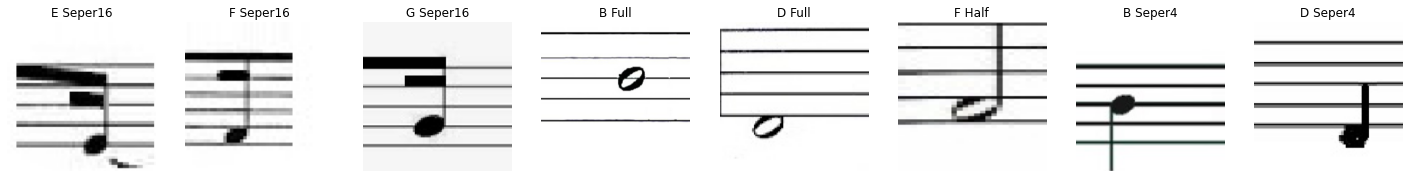

In [8]:
CLASS_NAMES = np.array(['A full',
 'A half',
 'A seper16',
 'A seper4',
 'A seper8',
 'B full',
 'B half',
 'B seper16',
 'B seper4',
 'B seper8',
 'C full',
 'C half',
 'C seper16',
 'C seper4',
 'C seper8',
 "C' full",
 "C' half",
 "C' seper16",
 "C' seper4",
 "C' seper8",
 'D full',
 'D half',
 'D seper16',
 'D seper4',
 'D seper8',
 'E full',
 'E half',
 'E seper16',
 'E seper4',
 'E seper8',
 'F full',
 'F half',
 'F seper16',
 'F seper4',
 'F seper8',
 'G full',
 'G half',
 'G seper16',
 'G seper4',
 'G seper8',], dtype='<U10')

import matplotlib.pyplot as plt

def show_batch(image_batch, label_batch):
  plt.figure(figsize=(25,25))
  for n in range(8):
      ax = plt.subplot(1,8,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
      
image_batch, label_batch = next(train_gen)
show_batch(image_batch, label_batch)

### ResNet152V2 Model 

In [9]:
ResNet_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=(img_h, img_w, 3))

234561536/234545216 [==============================] - 2s 0us/step


In [10]:
from tensorflow.keras import Model 
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Dropout, Flatten,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential

# The last 15 layers fine tune
for layer in ResNet_model.layers[:-15]:
    layer.trainable = False

x = ResNet_model.output
x = GlobalAveragePooling2D()(x)
x = Flatten()(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.4)(x)
x = Dense(units=512, activation='relu')(x)
x = Dropout(0.4)(x)
output  = Dense(units=40, activation='softmax')(x)
model = Model(ResNet_model.input, output)


model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
loss = tf.keras.losses.CategoricalCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss=loss, metrics= ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, TensorBoard, EarlyStopping
import time
import datetime

now = datetime.datetime.now
t = now()
lrr = ReduceLROnPlateau(monitor='val_accuracy', 
                        patience=3, 
                        verbose=1, 
                        factor=0.4, 
                        min_lr=0.0001)

NAME = "logs{}".format(int(time.time()))
tensorboard = TensorBoard(
    log_dir='/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/{}'.format(NAME))


checkpointer = ModelCheckpoint(
    filepath='/content/drive/MyDrive/Colab Notebooks/restes/Hasil Training/best_model.h5', 
    monitor='val_accuracy', 
    save_best_only=True, 
    mode='auto')

#earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

callbacks = [lrr, tensorboard, checkpointer]

STEP_SIZE_TRAIN=train_gen.n//train_gen.batch_size
STEP_SIZE_VALID=valid_gen.n//valid_gen.batch_size
transfer_learning_history = model.fit_generator(generator=train_gen,
                   steps_per_epoch=STEP_SIZE_TRAIN,
                   validation_data=valid_gen,
                   validation_steps=STEP_SIZE_VALID,
                   epochs=150,
                   verbose=1,
                  callbacks=callbacks,                                 
)
print('Jumlah train data: ', STEP_SIZE_TRAIN)
print('Jumlah validation data: ', STEP_SIZE_VALID)
print(transfer_learning_history.history.keys())
print('Training time: %s' % (now() - t))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:37: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/150
